<a href="https://colab.research.google.com/github/kumaradityaka/Machine-learning/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
tf.config.experimental.list_physical_devices()

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

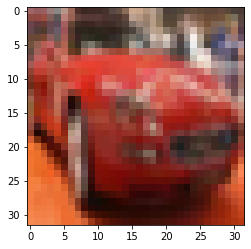

In [ ]:
index = 5
plt.imshow(X_train[index])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
#y_train_flatten = y_train.reshape(y_train.shape[0],-1).T
#X_test_flatten = X_test.reshape(X_test.shape[0],-1).T
#y_test_flatten = y_test.reshape(y_test.shape[0],-1).T
y_train.shape

(50000, 1)

In [ ]:
X_train_final = X_train/255
#y_train_final = y_train_flatten/255
X_test_final = X_test/255
#y_test_final = y_test_flatten/255

In [ ]:
def relu(z):
  
  return max(0,z)

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_final, y_train_categorical, epochs=1)

1563/1563 [==============================] - 72s 46ms/step - loss: 1.9298 - accuracy: 0.3056


In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
prediction = model.predict(X_test_final)

In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_final, y_train_categorical, epochs=1)

1563/1563 [==============================] - 72s 46ms/step - loss: 1.9324 - accuracy: 0.3023
1 loop, best of 1: 1min 12s per loop


In [ ]:
np.argmax(prediction[9])

1

In [ ]:
y_test[9]

array([1], dtype=uint8)

# CNN Implementation

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 3.2933 - accuracy: 0.2945
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.3525 - accuracy: 0.5197
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1631 - accuracy: 0.5923
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0229 - accuracy: 0.6470
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9365 - accuracy: 0.6783
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8721 - accuracy: 0.6983
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7981 - accuracy: 0.7231
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7493 - accuracy: 0.7417
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6969 - accuracy: 0.7558
Epoch 10/10
1563/1563 [==============================] - 58s 37m